In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from src.image_util import remake_image, open_rgb, open_rgba, similarity_feature

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
! python src\generator.py -i . -o .

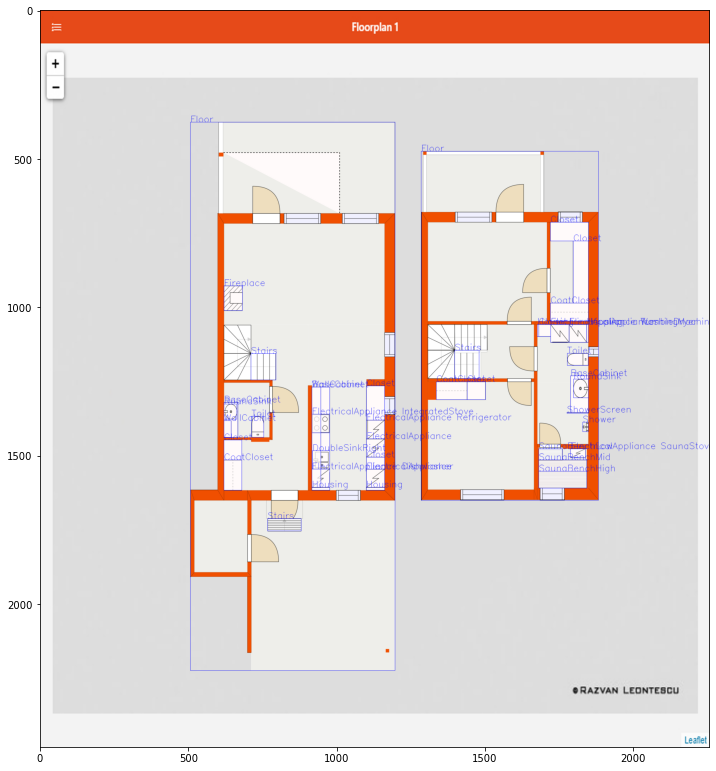

In [25]:
im = open_rgb('saved.png')
plt.figure(figsize=(12, 16))
plt.imshow(im)
plt.show()

In [8]:
d = {}

def test(d) :
    d['123'] = 123

test(d)
print(d)

{'123': 123}


In [13]:
x = "hello"

#if condition returns False, AssertionError is raised:
assert x == "ehe", "x should be 'hello'"

AssertionError: x should be 'hello'

In [11]:
plt.imshow(img)

NameError: name 'img' is not defined

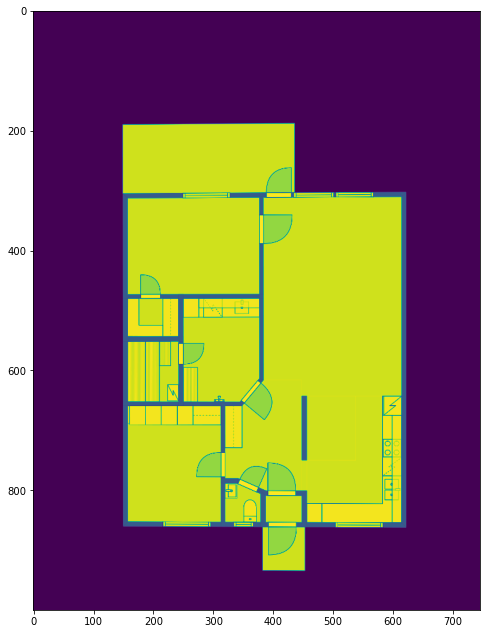

In [22]:
im = similarity_feature(img, nimg)

plt.figure(figsize = (8,12))
plt.imshow(im)
plt.show()